In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)

colors = {
    "p53": "#008DD5",
    "nutlin": "#DB5461",
    "nfkb": "#C33149",
    "tnf": "#107E7D",
    "gray": "#DAE0DC",
    "Mf": "#00A878",
    "mdm2_rna": "#FFA552"
}

In [3]:
vi = 0.01
Vol = vi*10**(-14); NA = 6.02*10**(23); Cal = NA*Vol*10**(-6)
TC = 0.158
kc1 = 0.15*Cal*TC
# production of p53 [molecules/min]
kc2 = 0.1*TC
# degradation of p53 by mdm2 [1/min]
kc3 = 0.1*Cal
# degradation of p53 by mdm2 [molecules]
kc4 = 0.1/Cal*TC
# production of mdm2 - mRNA [1/(molecules*min)]
kc5 = 0.1*TC 
# degradation of mdm2 - mRNA [1/min]
kc6 = 0.2*TC 
# production of mdm2 [1/min]
kc7 = 0.1*TC 
# degradation of mdm2 [1/min]
kc8 = 0.0036 
# binding of mdm2 and nutlin [1/(molecules*min)]

In [4]:
def p_change(t, p, m, Mf):
    dpdt = kc1 - kc2*Mf*(p / (kc3 + p))
    return dpdt

def m_change(t, p, m, Mf):
    dmdt = (kc4 * p**2 - kc5 * m)
    return dmdt

def M_free_change(t, p, m, Mf):
    dM_freedt = kc6 * m - kc7 * Mf
    return dM_freedt

def samlet_system(t, y):
    dydt = np.zeros_like(y)
    dydt[0] = p_change(t, *y)
    dydt[1] = m_change(t, *y)
    dydt[2] = M_free_change(t, *y)
    return dydt

In [5]:
t_samlet = (0, 5000)

p0, m0, Mf0 = 1, 1, 1

y0 = [p0, m0, Mf0]

In [7]:
sim = solve_ivp(samlet_system, t_samlet, y0, method='LSODA', max_step=0.1, dense_output=True)

In [8]:
t = sim_sus["t"]
p = sim_sus["y"][0]
m = sim_sus["y"][1]
M = sim_sus["y"][2]

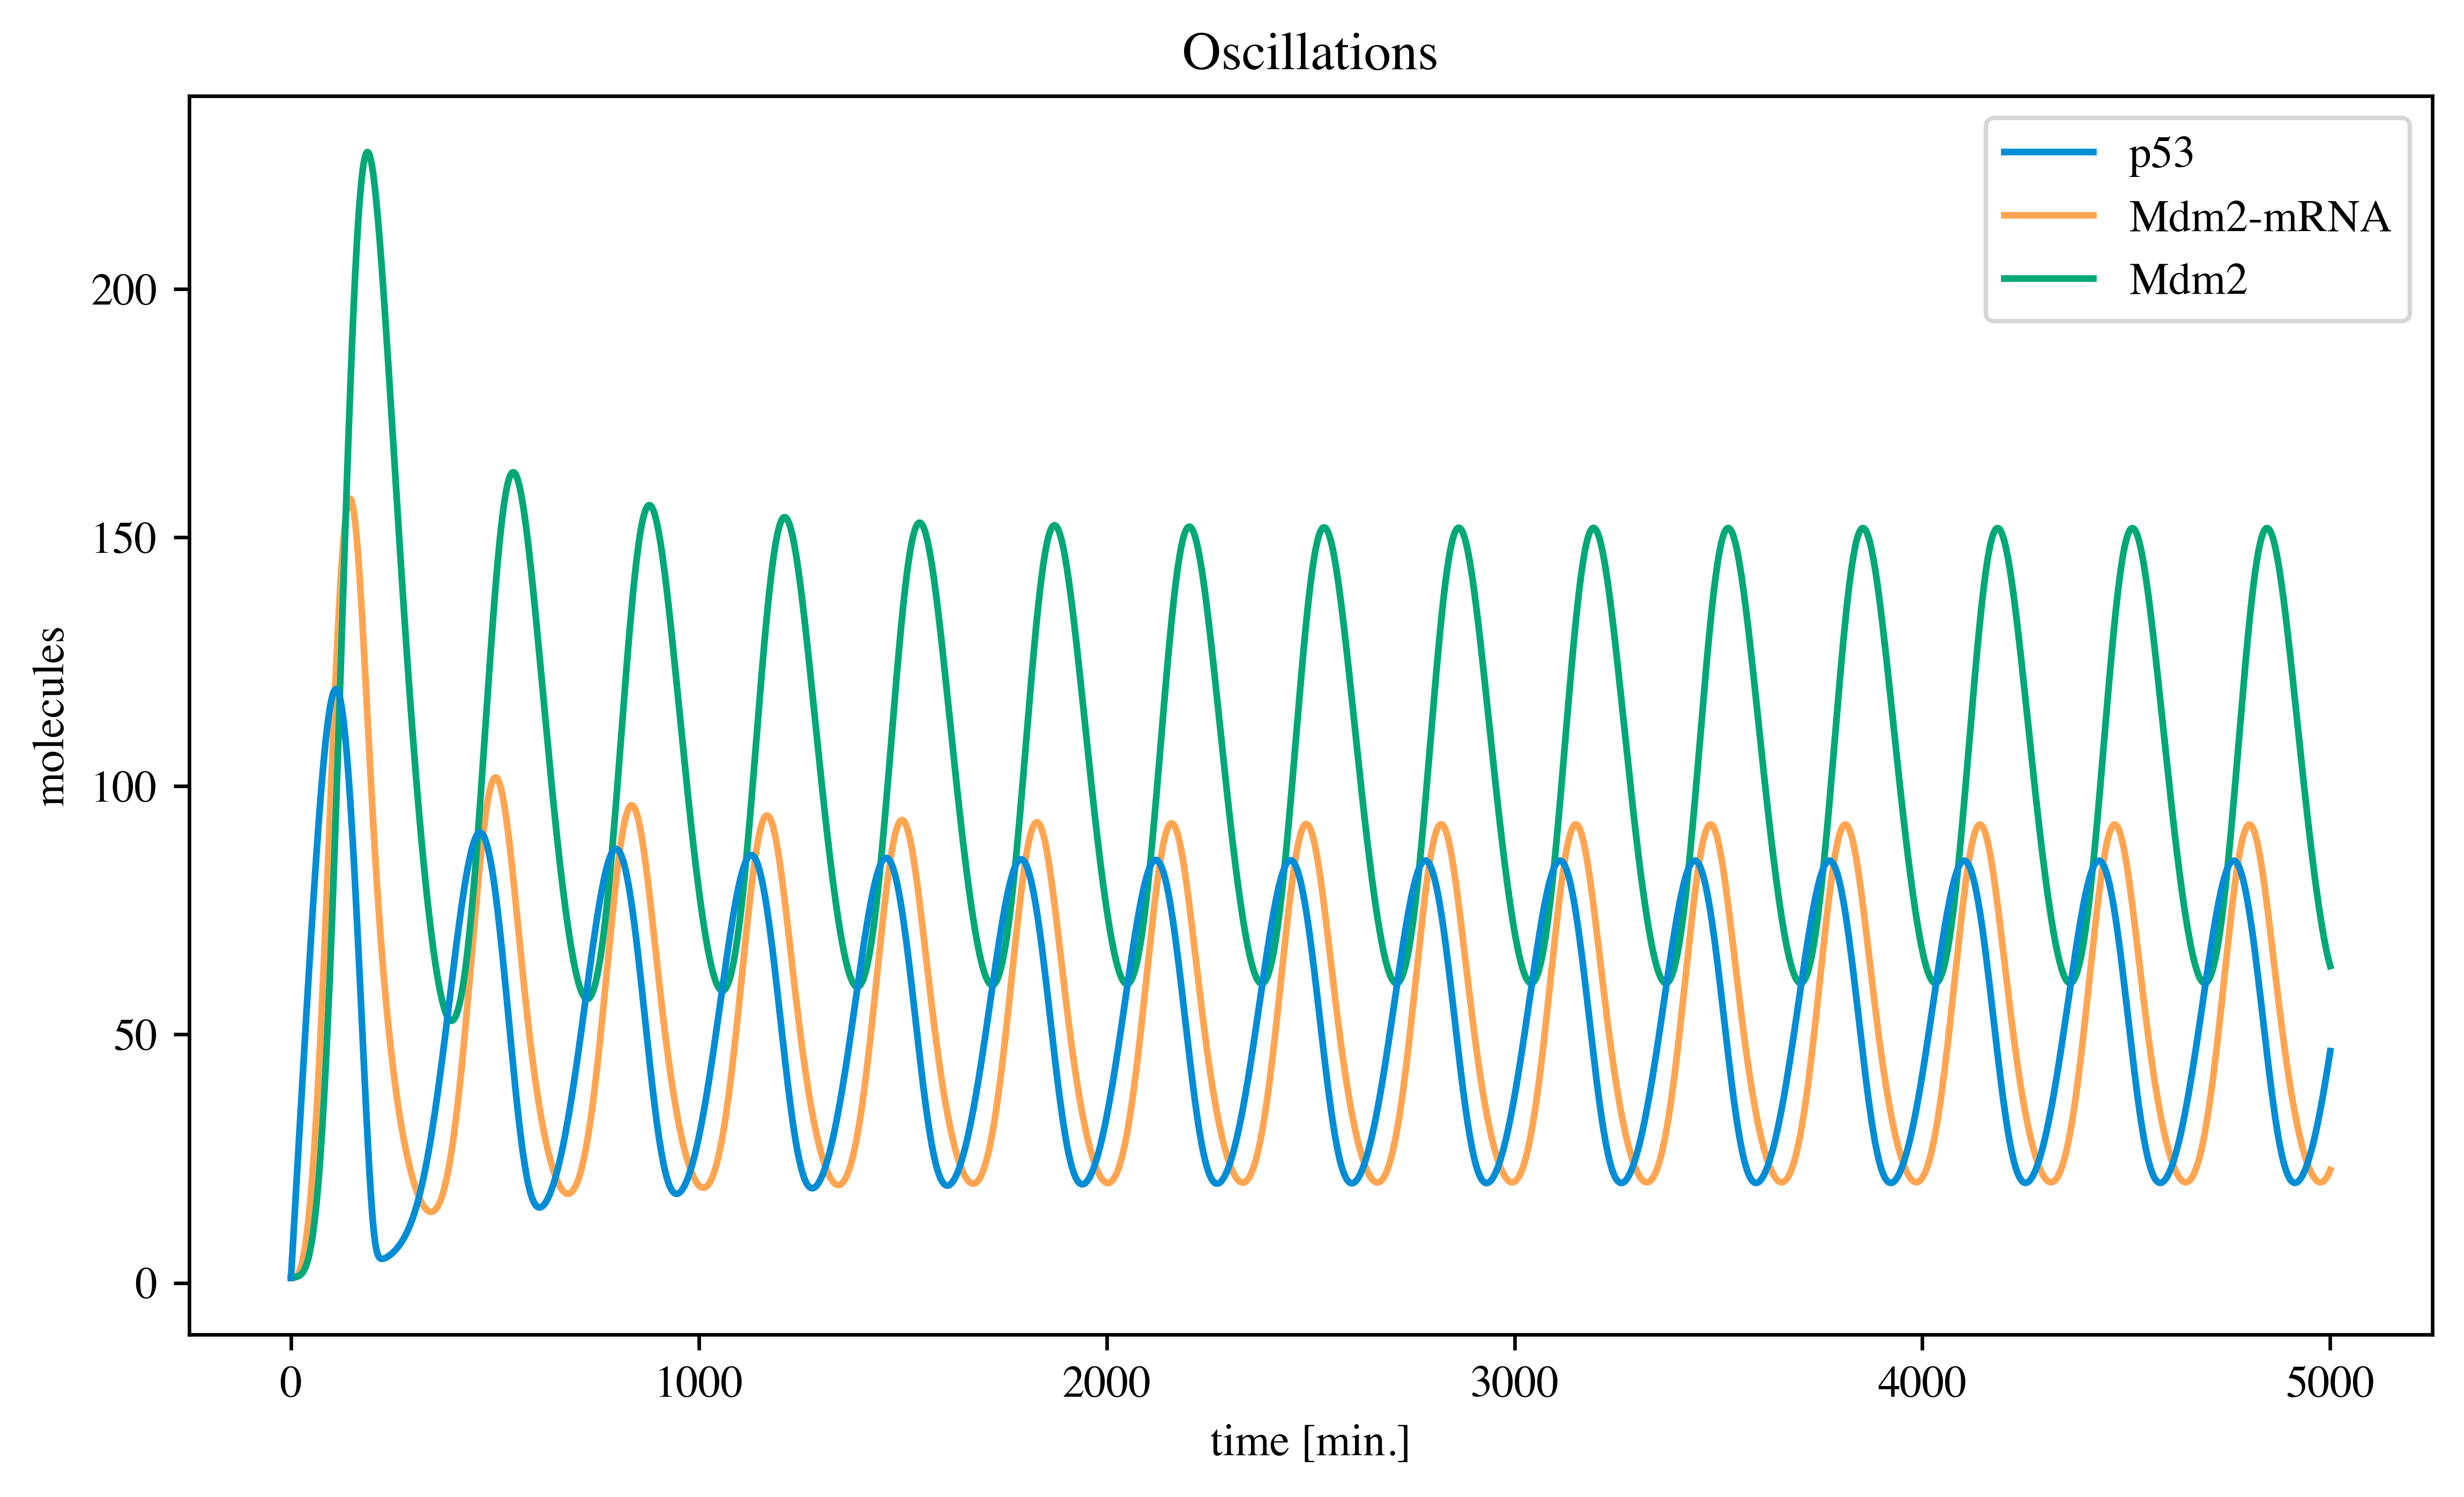

In [13]:
plt.figure(dpi=600, figsize=[9, 5])
plt.plot(t, p, color=colors["p53"], zorder=5, label="p53")
plt.plot(t, m, color=colors["mdm2_rna"], label="Mdm2-mRNA")
plt.plot(t, M, color=colors["Mf"], label="Mdm2")
plt.title("Oscillations")
plt.xlabel("time [min.]")
plt.ylabel("molecules")
plt.legend();